In [ ]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
import pandas as pd

PART A

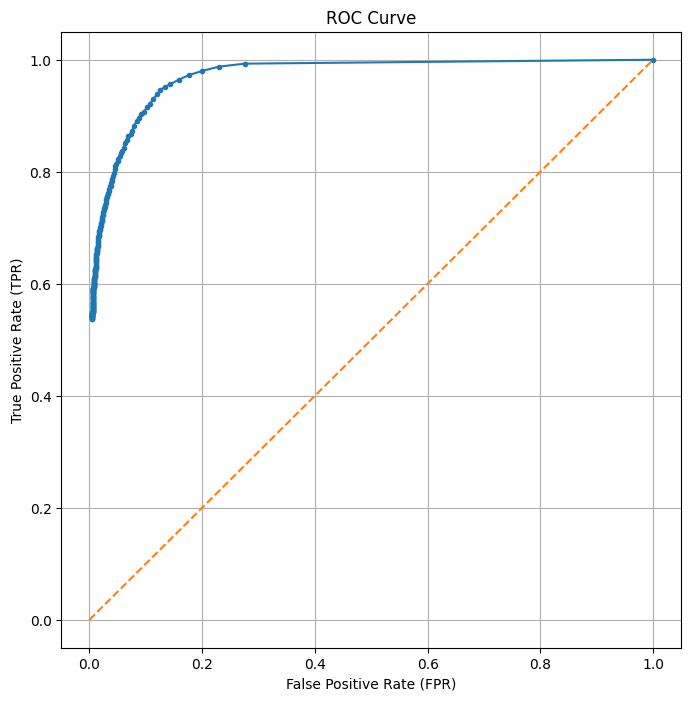

       gamma  P(D=0|Y=1;gamma)  P(D=1|Y=0;gamma)
0   0.000000          0.000000          1.000000
1   0.100503          0.006995          0.275364
2   0.201005          0.012325          0.229923
3   0.301508          0.020320          0.198914
4   0.402010          0.027315          0.177051
..       ...               ...               ...
95  9.547739          0.368421          0.011003
96  9.648241          0.370753          0.010717
97  9.748744          0.372418          0.010717
98  9.849246          0.372418          0.010717
99  9.949749          0.373085          0.010574

[100 rows x 3 columns]


In [ ]:
# Given parameters
n_samples = 10000

# Class priors
p_y0 = 0.7
p_y1 = 0.3

# Means and covariance matrices
mu_0 = np.array([-1, 1, -1, 1])
mu_1 = np.array([1, 1, 1, 1])

sigma_0 = np.array([[2, -0.5, 0.3, 0],
                    [-0.5, 1, -0.5, 0],
                    [0.3, -0.5, 1, 0],
                    [0, 0, 0, 2]])

sigma_1 = np.array([[1, 0.3, -0.2, 0],
                    [0.3, 2, 0.3, 0],
                    [-0.2, 0.3, 1, 0],
                    [0, 0, 0, 3]])

# Generate samples
samples = np.zeros((n_samples, 4))
labels = np.zeros(n_samples)

for i in range(n_samples):
    if np.random.rand() < p_y0:
        samples[i, :] = np.random.multivariate_normal(mu_0, sigma_0)
        labels[i] = 0
    else:
        samples[i, :] = np.random.multivariate_normal(mu_1, sigma_1)
        labels[i] = 1

# Calculate the likelihood ratio for each sample
pdf_0 = multivariate_normal.pdf(samples, mean=mu_0, cov=sigma_0)
pdf_1 = multivariate_normal.pdf(samples, mean=mu_1, cov=sigma_1)
likelihood_ratio = pdf_1 / pdf_0

# Save the data and labels
data = np.hstack((samples, labels.reshape(-1, 1), likelihood_ratio.reshape(-1, 1)))
data_df = pd.DataFrame(data, columns=["x1", "x2", "x3", "x4", "label", "likelihood_ratio"])

# Vary the threshold gamma and compute TPR and FPR
thresholds = np.linspace(0, 20, 200)
tpr = []
fpr = []

for gamma in thresholds:
    predicted_labels = (data_df['likelihood_ratio'] > gamma).astype(int)
    tp = np.sum((predicted_labels == 1) & (data_df['label'] == 1))
    fn = np.sum((predicted_labels == 0) & (data_df['label'] == 1))
    fp = np.sum((predicted_labels == 1) & (data_df['label'] == 0))
    tn = np.sum((predicted_labels == 0) & (data_df['label'] == 0))

    tpr.append(tp / (tp + fn))
    fpr.append(fp / (fp + tn))

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, marker='.')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.grid(True)
plt.show()

# Print P(D = 0 | Y = 1; gamma) and P(D = 1 | Y = 0; gamma) for each gamma value
results_df = pd.DataFrame({
    'gamma': thresholds,
    'P(D=0|Y=1;gamma)': 1 - np.array(tpr),
    'P(D=1|Y=0;gamma)': np.array(fpr)
})

# Display first 10 rows of the results
print(results_df.head(100))


In [ ]:
PART B

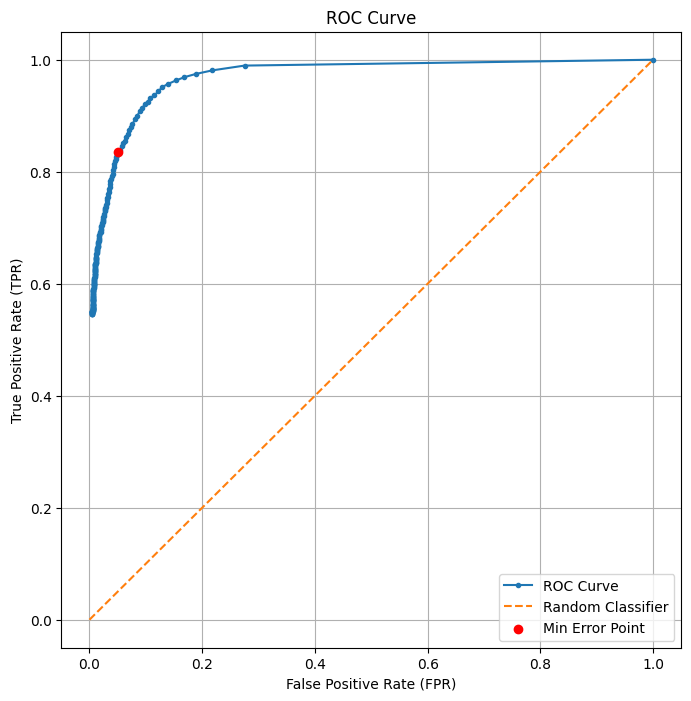

Threshold value that achieves minimum probability of error: 2.613065326633166
Minimum probability of error: 0.08519168641391323
True Positive Rate at minimum error: 0.8359528487229863
False Positive Rate at minimum error: 0.05139648718687014
      gamma  P(D=0|Y=1;gamma)  P(D=1|Y=0;gamma)  Error Probability
0  0.000000          0.000000          1.000000           0.700000
1  0.100503          0.010478          0.275122           0.195729
2  0.201005          0.018991          0.218111           0.158375
3  0.301508          0.025540          0.188166           0.139378
4  0.402010          0.031107          0.168586           0.127342
5  0.502513          0.037001          0.153470           0.118529
6  0.603015          0.043222          0.139505           0.110620
7  0.703518          0.049116          0.128707           0.104830
8  0.804020          0.056647          0.122229           0.102554
9  0.904523          0.063523          0.115174           0.099679


In [ ]:
# Given parameters
n_samples = 10000

# Class priors
p_y0 = 0.7
p_y1 = 0.3

# Means and covariance matrices
mu_0 = np.array([-1, 1, -1, 1])
mu_1 = np.array([1, 1, 1, 1])

sigma_0 = np.array([[2, -0.5, 0.3, 0],
                    [-0.5, 1, -0.5, 0],
                    [0.3, -0.5, 1, 0],
                    [0, 0, 0, 2]])

sigma_1 = np.array([[1, 0.3, -0.2, 0],
                    [0.3, 2, 0.3, 0],
                    [-0.2, 0.3, 1, 0],
                    [0, 0, 0, 3]])

# Generate samples
samples = np.zeros((n_samples, 4))
labels = np.zeros(n_samples)

for i in range(n_samples):
    if np.random.rand() < p_y0:
        samples[i, :] = np.random.multivariate_normal(mu_0, sigma_0)
        labels[i] = 0
    else:
        samples[i, :] = np.random.multivariate_normal(mu_1, sigma_1)
        labels[i] = 1

# Calculate the likelihood ratio for each sample
pdf_0 = multivariate_normal.pdf(samples, mean=mu_0, cov=sigma_0)
pdf_1 = multivariate_normal.pdf(samples, mean=mu_1, cov=sigma_1)
likelihood_ratio = pdf_1 / pdf_0

# Save the data and labels
data = np.hstack((samples, labels.reshape(-1, 1), likelihood_ratio.reshape(-1, 1)))
data_df = pd.DataFrame(data, columns=["x1", "x2", "x3", "x4", "label", "likelihood_ratio"])

# Vary the threshold gamma and compute TPR, FPR, and error probability
thresholds = np.linspace(0, 20, 200)
tpr = []
fpr = []
error_prob = []

for gamma in thresholds:
    predicted_labels = (data_df['likelihood_ratio'] > gamma).astype(int)
    tp = np.sum((predicted_labels == 1) & (data_df['label'] == 1))
    fn = np.sum((predicted_labels == 0) & (data_df['label'] == 1))
    fp = np.sum((predicted_labels == 1) & (data_df['label'] == 0))
    tn = np.sum((predicted_labels == 0) & (data_df['label'] == 0))

    tpr.append(tp / (tp + fn))
    fpr.append(fp / (fp + tn))

    p_error = (fp / (fp + tn)) * p_y0 + (fn / (tp + fn)) * p_y1
    error_prob.append(p_error)

# Find the threshold with minimum error probability
min_error_index = np.argmin(error_prob)
min_error_gamma = thresholds[min_error_index]
min_error_tpr = tpr[min_error_index]
min_error_fpr = fpr[min_error_index]

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, marker='.', label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')
plt.scatter([min_error_fpr], [min_error_tpr], color='red', zorder=5, label='Min Error Point')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

# Report the minimum probability of error
min_error_prob = error_prob[min_error_index]

print(f"Threshold value that achieves minimum probability of error: {min_error_gamma}")
print(f"Minimum probability of error: {min_error_prob}")
print(f"True Positive Rate at minimum error: {min_error_tpr}")
print(f"False Positive Rate at minimum error: {min_error_fpr}")

# Display first 10 rows of the results
results_df = pd.DataFrame({
    'gamma': thresholds,
    'P(D=0|Y=1;gamma)': 1 - np.array(tpr),
    'P(D=1|Y=0;gamma)': np.array(fpr),
    'Error Probability': np.array(error_prob)
})

print(results_df.head(10))


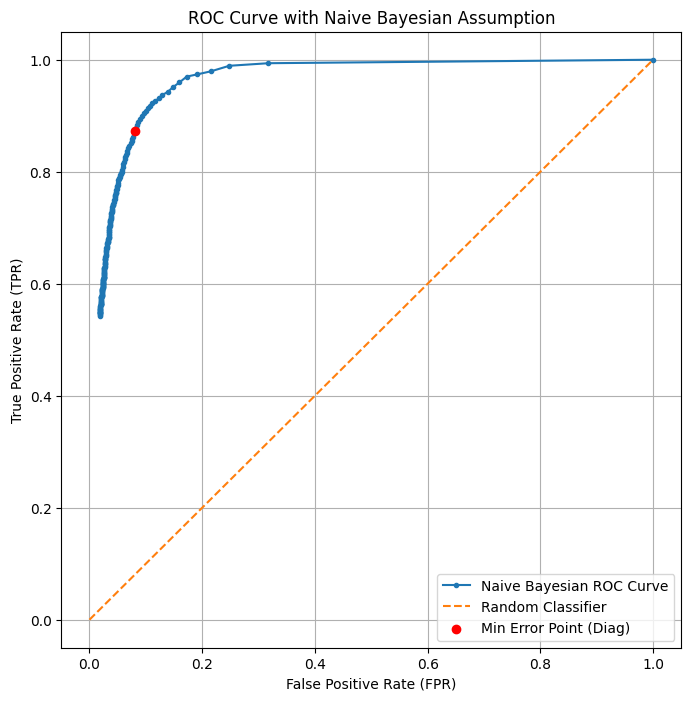

Threshold value that achieves minimum probability of error (Diag): 2.21105527638191
Minimum probability of error (Diag): 0.09395845264315103
True Positive Rate at minimum error (Diag): 0.8735255570117956
False Positive Rate at minimum error (Diag): 0.0800230282095567
      gamma  P(D=0|Y=1;gamma)  P(D=1|Y=0;gamma)  Error Probability
0  0.000000          0.000000          1.000000           0.700000
1  0.100503          0.006225          0.317645           0.224219
2  0.201005          0.010813          0.248129           0.176934
3  0.301508          0.020642          0.215746           0.157215
4  0.402010          0.026212          0.190990           0.141557
5  0.502513          0.030144          0.172568           0.129841
6  0.603015          0.040629          0.159470           0.123818
7  0.703518          0.049148          0.148100           0.118415
8  0.804020          0.057667          0.138601           0.114321
9  0.904523          0.062910          0.129246           0.10

In [ ]:
import numpy as np
from scipy.stats import multivariate_normal
import pandas as pd
import matplotlib.pyplot as plt

# Assume diagonal covariance matrices with variances from true covariance matrices
sigma_0_diag = np.diag(np.diag(sigma_0))
sigma_1_diag = np.diag(np.diag(sigma_1))

# Generate samples from Part A (already generated, using the same data)
# samples, labels, likelihood_ratio from Part A

# Calculate the likelihood ratio using the assumed diagonal covariance matrices
pdf_0_diag = multivariate_normal.pdf(samples, mean=mu_0, cov=sigma_0_diag)
pdf_1_diag = multivariate_normal.pdf(samples, mean=mu_1, cov=sigma_1_diag)
likelihood_ratio_diag = pdf_1_diag / pdf_0_diag

# Save the data with new likelihood ratios
data_diag = np.hstack((samples, labels.reshape(-1, 1), likelihood_ratio_diag.reshape(-1, 1)))
data_df_diag = pd.DataFrame(data_diag, columns=["x1", "x2", "x3", "x4", "label", "likelihood_ratio_diag"])

# Vary the threshold gamma and compute TPR, FPR, and error probability for the diagonal assumption
thresholds = np.linspace(0, 20, 200)
tpr_diag = []
fpr_diag = []
error_prob_diag = []

for gamma in thresholds:
    predicted_labels_diag = (data_df_diag['likelihood_ratio_diag'] > gamma).astype(int)
    tp_diag = np.sum((predicted_labels_diag == 1) & (data_df_diag['label'] == 1))
    fn_diag = np.sum((predicted_labels_diag == 0) & (data_df_diag['label'] == 1))
    fp_diag = np.sum((predicted_labels_diag == 1) & (data_df_diag['label'] == 0))
    tn_diag = np.sum((predicted_labels_diag == 0) & (data_df_diag['label'] == 0))

    tpr_diag.append(tp_diag / (tp_diag + fn_diag))
    fpr_diag.append(fp_diag / (fp_diag + tn_diag))

    p_error_diag = (fp_diag / (fp_diag + tn_diag)) * p_y0 + (fn_diag / (tp_diag + fn_diag)) * p_y1
    error_prob_diag.append(p_error_diag)

# Find the threshold with minimum error probability
min_error_index_diag = np.argmin(error_prob_diag)
min_error_gamma_diag = thresholds[min_error_index_diag]
min_error_tpr_diag = tpr_diag[min_error_index_diag]
min_error_fpr_diag = fpr_diag[min_error_index_diag]

# Plot the ROC curve for the diagonal assumption
plt.figure(figsize=(8, 8))
plt.plot(fpr_diag, tpr_diag, marker='.', label='Naive Bayesian ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')
plt.scatter([min_error_fpr_diag], [min_error_tpr_diag], color='red', zorder=5, label='Min Error Point (Diag)')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve with Naive Bayesian Assumption')
plt.legend()
plt.grid(True)
plt.show()

# Report the minimum probability of error for the diagonal assumption
min_error_prob_diag = error_prob_diag[min_error_index_diag]

print(f"Threshold value that achieves minimum probability of error (Diag): {min_error_gamma_diag}")
print(f"Minimum probability of error (Diag): {min_error_prob_diag}")
print(f"True Positive Rate at minimum error (Diag): {min_error_tpr_diag}")
print(f"False Positive Rate at minimum error (Diag): {min_error_fpr_diag}")

# Display first 10 rows of the results for the diagonal assumption
results_df_diag = pd.DataFrame({
    'gamma': thresholds,
    'P(D=0|Y=1;gamma)': 1 - np.array(tpr_diag),
    'P(D=1|Y=0;gamma)': np.array(fpr_diag),
    'Error Probability': np.array(error_prob_diag)
})

print(results_df_diag.head(10))
